Cluster analysis doesn't have label, is an unsupervised learning.

Centroid: the center of a cluster

K-means: 
    1. choose the number of clusters k
    2. specify the cluster seeds (the centroid)
    3. assign each point to a centroid based on the Euclidean distance
    4. Adjust the centroids by recalculating the distance

#### The cons of using K-means cluster
* K-means is sensitive to initialization: if the initial seeds are problematic, the whole solution can be wrong.

To solve this problem, use k-means++: an algorithm to find the best initial seeds and it's automatically added to k-means cluster algorithm.

* Sensitive to outliers: you can remove the outliers to solve this problem

* Produces spherical solutions (rather than elliptical) : remove outliers to optimize this 

* Standardization: by standardizing axes, we remove the weight introduced by the high scale variables, and the result become a square and it's not able to be clustered. But in some cases, one of the variable is too large and it diminishes the effect of other variables, standardizing this variable is helpful to put more weight of other variables. Standardization is trying to put all variables on equal footing. Wether or not to standardize depends on the situation. If there's a very important variable, this variable should not be standardized.

# A simple cluster analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [22]:
data=pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

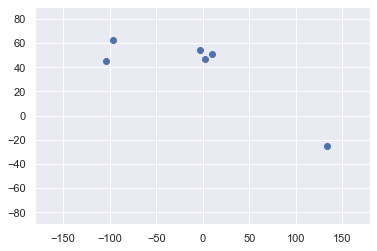

In [23]:
#plot the data
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [24]:
#select the features
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [25]:
#clustering
kmeans = KMeans(2)

In [26]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [27]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [29]:
#get the clustered result together with the data table
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


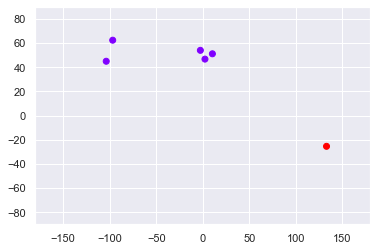

In [31]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Cluster using the categorical data

In [33]:
#map the data
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [41]:
#select the features
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [42]:
#clustering
kmeans=KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 2, 2, 0], dtype=int32)

In [43]:
#get the clustered result together with the data table
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


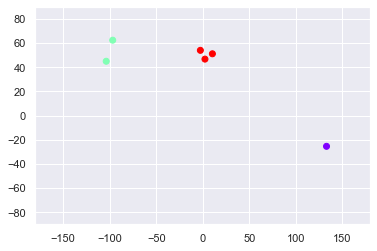

In [44]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# The method for choosing the right number of clusters (K)
### The elbow method
* **WCSS** (within-cluster sum of squares): if we minimize WCSS, we have reached the perfect clustering solution

* plot the WCSS on y-axis, and number of clusters on x-axis, the graph is like an elbow. The optimal number of K is the elbow (where the graph turns)


In [46]:
#calculate WCSS
kmeans.inertia_

290.10523333333333

In [47]:
wcss =[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [48]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

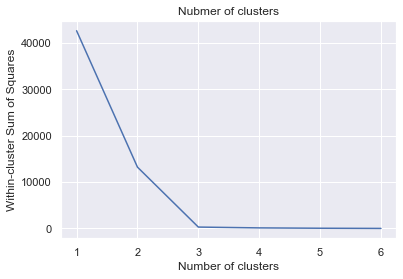

In [50]:
#plot the elbow method graph
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Nubmer of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Interpretaion:
the possible k number can be 2 or 3 and 3 is better.

# Market Segmentation with Cluster Analysis

In [51]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


This is the rating of a service. Satisfaction is how satisfied the customer is based on self-reported survey. Loyalty rate is already standardized.

Text(0, 0.5, 'Loyalty')

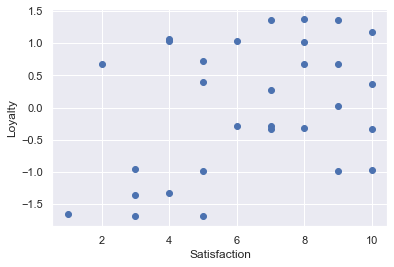

In [53]:
#plot the data
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [54]:
x = data.copy()

In [55]:
kmeans =KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [56]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

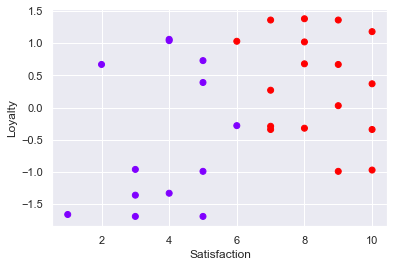

In [57]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c = clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Because the satisfaction is not standardized, the weight of satisfaction is much larger. The result is basically solely based on Satisfaction. One group is when satisfaction <6, the other group is when satisfaction > 6.

In [58]:
#Standardize the variables
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [59]:
#elbow method
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[59.99999999999999,
 29.818973034723143,
 18.058485014940032,
 10.24718180592842,
 7.792695153937187,
 6.586212092192188,
 5.326631124753925,
 4.358871893303257,
 3.731185392455718]

Text(0, 0.5, 'WCSS')

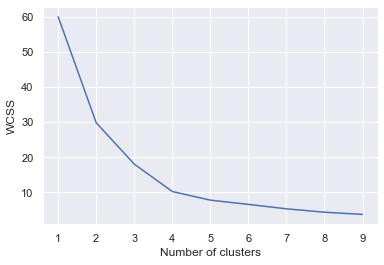

In [60]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [61]:
#explore clustering solutions and select the number of clusters
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [63]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

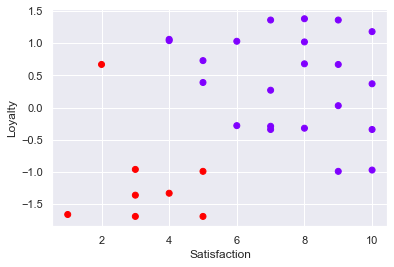

In [64]:
#plot the result with the original unstandardized data
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [65]:
#repeat with k=3
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

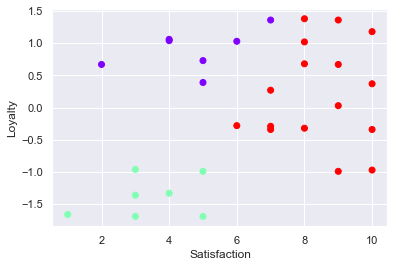

In [66]:
#plot the result with the original unstandardized data
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Interpretation: the green cluster can be called 'alienated' cluster since these customers are not satisfied and don't have loyalty. The purple cluster can be called as 'supporters' since they are not that satisfied but still stays for the business. The red cluster is everything else left and it's not a good enough cluster segementation.

In [69]:
#repeat with k=4
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

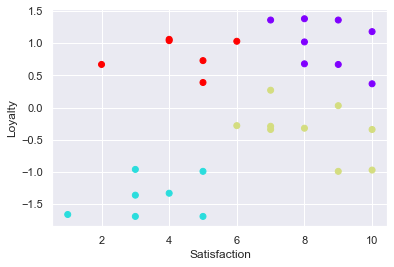

In [70]:
#plot the result with the original unstandardized data
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Interpretation: These clusters work the best and can be defined as alienated, supporters, fans, and roamers (satisfied but not loyal). In this way, the k=4 cluster is the best.

## Types of clustering
1. Flat --> K means
2. Hierarchical --> i.e., Taxonomy of the animal kingdom
    * Agglomerative (bottom-up) (easier to solve mathematically): start each data as an own cluster and group with other similar data
    * Divisive (top-down): using the elbow method and k means to increasing the k 1 by 1 until it's appropriate

## Using Seaborn to create heatmaps

In [72]:
data = pd.read_csv('Country clusters standardized.csv', index_col = 'Country')
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [73]:
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'],axis=1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


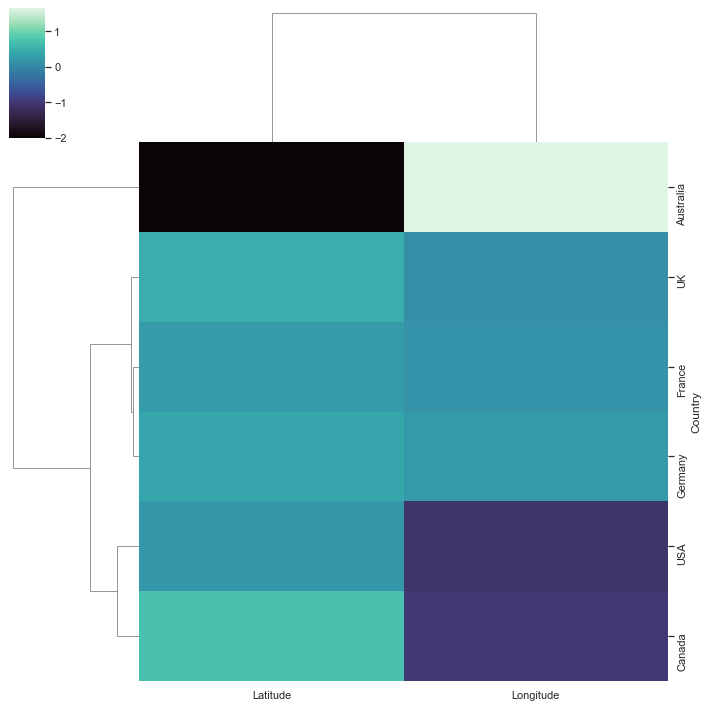

In [74]:
sns.clustermap(x_scaled,cmap='mako')

Interpretation: Seaborn created a dendrogram to show the tree map of the clusters. (The grey lines) For the latitude, all the countires are in similar blue color except Australia. And for Longitude, there are basically 3 groups of color, dark blue, blue, and light blue. In this way, the longitude gave us 3 clusters, and going upwards, Latitude gave us 2 clusters.